# P5

Due: 12/6/19, 11:59pm

In this assignment, we'll look at using SQL and create supervised learning classification models.

First, let's get our imports and system set up.

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [14]:
import sqlalchemy
import sqlite3

## SQL 

For this portion of the project you will look at querying a database `fec.db` that is a portion of the information reported to the Federal Elections Committee.  

Details on the form of the full data is provided here: https://classic.fec.gov/finance/disclosure/ftpdet.shtml

You will work with only a small portion of the data, ~10K transactions for each of the large tables.  

#### Table Descriptions 

Here is a list of the tables in the database. Each table links to the documentation on the FEC page for the dataset.

* [cn](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCandidateMaster.shtml): Candidates table. Contains names and party affiliation.
* [cm](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCommitteeMaster.shtml): Committees table. Contains committee names and types.
* [ccl](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCandCmteLinkage.shtml): Committee to candidate links.
* [oth](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryCommitteetoCommittee.shtml): Committee to committee transactions. 
* [pas2](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionstoCandidates.shtml): Contributions to Candidates from Committees.
* [indiv](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml): Individual contributions. Contains recipient committee ID and transaction amount.
* [indiv_top3](http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml): Individual contributions focusing on top 3 candidates: Clinton, Sanders, and Trump

We can again make use of the functions `print_sql` and `pretty_print_sql` to look at the results of the sql queries. 

In [15]:
def print_sql(s):
    print('>', s)
    for result in conn.execute(s):
        print(result)
    print ()

In [16]:
def pretty_print_sql(s):
    print('>', s)
    df = pd.read_sql(s, conn)
    display(df)

### Task 1

Connect to `fec.db` and ensure you can access tables. 

For example, run the following query: `SELECT * from cn LIMIT 5`

In [18]:
conn = sqlite3.connect("data/data/fec.db")

In [6]:
print_sql("SELECT * from cn LIMIT 10")

> SELECT * from cn LIMIT 10
('P00003392', 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'DEM', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00575795', '', '', 'NEW YORK', 'NY', '')
('P00004861', 'BICKELMEYER, MICHAEL', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00553206', '399 PEARL ROAD', '', 'BRUNSWICK', 'OH', '44212.0')
('P20002721', 'SANTORUM, RICHARD J.', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00578492', 'P.O. BOX 238', '', 'VERONA', 'PA', '15147.0')
('P20002838', 'HILL, CHRISTOPHER V', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00567743', '9900 CORPORATE CAMPUS DR STE 3000', '', 'LOUISVILLE', 'KY', '40223.0')
('P20003281', 'PERRY, JAMES R (RICK)', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00500587', 'PO BOX 162406', '', 'AUSTIN', 'TX', '78716.0')
('P20004065', 'WELLS, ROBERT CARR JR', 'DEM', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00506055', '7427 RAVANNA DRIVE', '', 'CHARLOTTE', 'NC', '28213.0')
('P40003576', 'PAUL, RAND', 'REP', '2016', 'US', 'P', '0.0', 'O', 'C', 'C00

### Task 2 (20 points)

**A.** We want to know the number of political actions committees (PACs) that donated large sums of money to the candidates. To begin to answer this question, we will look at the `oth` table. We'll find all the transactions that exceed $5,000.  Rather than print out the entire list. 
Construct a query to count the number of entries. 

In [7]:
print_sql("SELECT * from oth LIMIT 10")

> SELECT * from oth LIMIT 10
('C90011156', 'N', 'YE', 'G2016', '201701319042155051', '24A', 'IND', 'NAPPI, JULIE', 'CINCINNATI', 'OH', '452202216', '', '', '09152016', '34', 'P80001571', 'VN7CZA3ERW0', '1144686', '', '', '4020920171370093892')
('C00571372', 'A', 'YE', 'P2016', '201605209015994156', '24E', 'ORG', 'OATH STRATEGIES LLC', 'SPRINGFIELD', 'VA', '22152', '', '', '10092015', '250000', 'P60008059', 'SE24.1099', '1073914', '', '', '4052020161292981489')
('C90011156', 'N', 'YE', 'G2016', '201701319042157764', '24A', 'IND', 'GILL, VICTORIA', 'CHICAGO', 'IL', '606283437', '', '', '09222016', '3', 'P80001571', 'VN7CZA3TH23', '1144686', '', '', '4020920171370102032')
('C90011156', 'N', 'YE', 'G2016', '201701319042179408', '24E', 'IND', 'SIMONS, CHRISTOPHER', 'SWARTHMORE', 'PA', '19081', '', '', '11022016', '94', 'P00003392', 'VN7CZA743Y1', '1144686', '', '', '4020920171370166964')
('C90013244', 'N', 'Q1', 'P2016', '201604159012518596', '24A', 'ORG', 'FACEBOOK', 'MENLO PARK', 'CA', '9

In [8]:
#PRAGMA table_info(oth);

In [9]:
cursor_oth = conn.execute('select * from oth')
names = [description[0] for description in cursor_oth.description]
names

['cmte_id',
 'amndt_ind',
 'rpt_tp',
 'transaction_pgi',
 'image_num',
 'transaction_tp',
 'entity_tp',
 'name',
 'city',
 'state',
 'zip_code',
 'employer',
 'occupation',
 'transaction_dt',
 'transaction_amt',
 'other_id',
 'tran_id',
 'file_num',
 'memo_cd',
 'memo_text',
 'sub_id']

In [10]:
print_sql("""
SELECT count(*)
FROM oth
""")

> 
SELECT count(*)
FROM oth

(9999,)



In [11]:
print_sql("""
SELECT *
FROM oth
WHERE CAST(transaction_amt as float) > '5000'
LIMIT 10;
""")

> 
SELECT *
FROM oth
WHERE CAST(transaction_amt as float) > '5000'
LIMIT 10;

('C00571372', 'A', 'YE', 'P2016', '201605209015994156', '24E', 'ORG', 'OATH STRATEGIES LLC', 'SPRINGFIELD', 'VA', '22152', '', '', '10092015', '250000', 'P60008059', 'SE24.1099', '1073914', '', '', '4052020161292981489')
('C00495028', 'A', '30G', 'G2016', '201702079044302180', '24A', 'ORG', 'THE BAUGHMAN COMPANY, INC.', 'SAN FRANCISCO', 'CA', '941234505', '', '', '10252016', '14729', 'P80001571', 'VN7GDA6A1S7', '1147957', '', '', '4020920171370185577')
('C00341396', 'N', '30G', 'G2016', '201612089037807980', '24E', 'ORG', 'TCN, INC.', 'SAINT GEORGE', 'UT', '84770', '', '', '11212016', '19157', 'P00003392', 'SE.12673', '1131825', '', '', '4122120161357796245')
('C00003418', 'A', 'M7', 'G2016', '201511249004119298', '24A', 'ORG', 'BRANCH BANKING & TRUST', 'CHARLOTTE', 'NC', '28258', '', '', '06192015', '10393', 'P00003392', '2015M07SE0008', '1034359', '', '', '4112520151257827475')
('C00004861', 'N', 'M10', 'G2

In [12]:
print_sql("""
SELECT count(1)
FROM oth
WHERE CAST(transaction_amt as float) is not null
""")

> 
SELECT count(1)
FROM oth
WHERE CAST(transaction_amt as float) is not null

(9999,)



In [13]:
print_sql("""
SELECT count(1)
FROM oth
WHERE CAST(transaction_amt as float) > 5000;
""")

> 
SELECT count(1)
FROM oth
WHERE CAST(transaction_amt as float) > 5000;

(498,)



In [14]:
print_sql("""SELECT transaction_amt
FROM oth
WHERE CAST(transaction_amt as float) > 5000;
""")

> SELECT transaction_amt
FROM oth
WHERE CAST(transaction_amt as float) > 5000;

('250000',)
('14729',)
('19157',)
('10393',)
('5350',)
('13102',)
('8657',)
('24459',)
('31826',)
('15623',)
('12506',)
('33000',)
('195765',)
('22145',)
('10000',)
('125000',)
('11550',)
('13154',)
('57415',)
('644100',)
('315000',)
('40500',)
('66122',)
('138550',)
('5944',)
('8222',)
('24550',)
('6739',)
('360717',)
('32109',)
('16244',)
('8937',)
('9000',)
('80000',)
('26205',)
('9448',)
('13938',)
('7449',)
('9952',)
('30000',)
('14979',)
('7560',)
('27746',)
('43017',)
('10588',)
('385883',)
('66804',)
('16327',)
('539240',)
('18056',)
('55300',)
('24585',)
('20000',)
('11500',)
('48155',)
('22974',)
('166333',)
('5130',)
('59291',)
('6002',)
('11177',)
('10934',)
('6562',)
('29786',)
('5400',)
('33785',)
('6480',)
('41533',)
('33300',)
('20830',)
('107040',)
('89820',)
('5704',)
('12958',)
('6800',)
('42160',)
('20000',)
('359311',)
('6000',)
('5451',)
('31000',)
('318200',)
('18005',)
('6209',)
('77

**B.** Having seen that there aren't too many transactions that exceed 5,000 dollars, let's find them all.  Using only SQL, construct a table containing the ID of the donor committee, name, employer, other committee's/candidate's ID, and the transaction amount, for transactions that exceed 5,000 dollars.  Sort the transactions in decreasing order by amount.

In [15]:
pretty_print_sql("""
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    employer AS employer,
    other_id AS other_cmte_id,
    transaction_amt AS transaction_amt
FROM oth
WHERE CAST(transaction_amt as float) > 5000
ORDER BY CAST(transaction_amt as float) desc,donor_cmte_id desc;
""")

> 
SELECT 
    cmte_id AS donor_cmte_id, 
    name AS name, 
    employer AS employer,
    other_id AS other_cmte_id,
    transaction_amt AS transaction_amt
FROM oth
WHERE CAST(transaction_amt as float) > 5000
ORDER BY CAST(transaction_amt as float) desc,donor_cmte_id desc;



,donor_cmte_id,name,employer,other_cmte_id,transaction_amt
0,C00010603,GMMB,,P00003392,4645717
1,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,2758566
2,C00495861,TARGETED PLATFORM MEDIA LLC,,P80001571,1704667
3,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,1217580
4,C00574533,DEL CIELO MEDIA,,P00003392,1100000
5,C00571372,OATH STRATEGIES LLC,,P60008059,1032549
6,C00592337,"SRCP MEDIA, INC.",,P60006111,1029303
7,C00541292,"TARGET ENTERPRISES, LLC",,P60006723,951130
8,C00495861,FUSE,,P80001571,644100
9,C00573154,NEYLAN & PARTNERS,,P60007242,643000


**C.** We might see the same committee in this table multiple times.  Therefore, let's instead report the total transactions by each commitee.  Return the committee ID, name and total transaction amount.  Limit your results to the top 20. 

In [16]:
pretty_print_sql("""
SELECT 
    cmte_id AS donor_commitee_id, 
    name, 
    sum(transaction_amt) AS total_transaction_amount
FROM oth
GROUP BY cmte_id
ORDER BY CAST(total_transaction_amount as float) DESC
LIMIT 20;
""")

> 
SELECT 
    cmte_id AS donor_commitee_id, 
    name, 
    sum(transaction_amt) AS total_transaction_amount
FROM oth
GROUP BY cmte_id
ORDER BY CAST(total_transaction_amount as float) DESC
LIMIT 20;



,donor_commitee_id,name,total_transaction_amount
0,C00541292,"TARGET ENTERPRISES, LLC",8873217
1,C00010603,"ANZALONE LISZT RESEARCH, INC.",5031605
2,C00495861,FUSE,3268832
3,C00571372,OATH STRATEGIES LLC,2725554
4,C00608489,GROUND GAME STRATEGIES,1897869
5,C00592337,"SRCP MEDIA, INC.",1429303
6,C00581868,"NEW DAY MEDIA, LLC",1424832
7,C00473918,"PRECISION NETWORK, LLC",1254076
8,C00574533,REDPRINT STRATEGY,1219343
9,C00575373,GLITTERING STEEL LLC,1046392


**D.** Look at common transactions between donor and recipient committees.  Find the fields that uniquely identify recipient committees and repeat your analysis from the previous question using that new identifier. Return the committee ID, *new field* and total transaction amount.  Limit your results to the top 20. 

In [17]:
pretty_print_sql("""
SELECT cmte_id as committee_ID,
       other_id as newfield,
       sum(transaction_amt) as total_transaction_amount
FROM oth

GROUP BY cmte_id
ORDER BY total_transaction_amount DESC
LIMIT 20;
""")

> 
SELECT cmte_id as committee_ID,
       other_id as newfield,
       sum(transaction_amt) as total_transaction_amount
FROM oth

GROUP BY cmte_id
ORDER BY total_transaction_amount DESC
LIMIT 20;



,committee_ID,newfield,total_transaction_amount
0,C00541292,P60006723,8873217
1,C00010603,P00003392,5031605
2,C00495861,P80001571,3268832
3,C00571372,P60008059,2725554
4,C00608489,P00003392,1897869
5,C00592337,P60006111,1429303
6,C00581868,P60003670,1424832
7,C00473918,P00003392,1254076
8,C00574533,P00003392,1219343
9,C00575373,P60006111,1046392


### Task 3 (5 points) 

From the query **D** above, let's add additional information by considering joining with the `cm` table and `cn` table in order to get the names of committees or candidates involved in the transactions. 

In [18]:
cursor_cm = conn.execute('select * from cm')
names2 = [description[0] for description in cursor_cm.description]
names2

['cmte_id',
 'cmte_nm',
 'tres_nm',
 'cmte_st1',
 'cmte_st2',
 'cmte_city',
 'cmte_st',
 'cmte_zip',
 'cmte_dsgn',
 'cmte_tp',
 'cmte_pty_affiliation',
 'cmte_filing_freq',
 'org_tp',
 'connected_org_nm',
 'cand_id']

In [19]:
cursor_cn = conn.execute('select * from cn')
names3 = [description[0] for description in cursor_cn.description]
names3

['cand_id',
 'cand_name',
 'cand_pty_affiliation',
 'cand_election_yr',
 'cand_office_st',
 'cand_office',
 'cand_office_district',
 'cand_ici',
 'cand_status',
 'cand_pcc',
 'cand_st1',
 'cand_st2',
 'cand_city',
 'cand_st',
 'cand_zip']

In [20]:
pretty_print_sql("""
SELECT
    oth.cmte_id as committee_ID,
    cn.cand_name as candiate_name,
    oth.other_id as newfield,
    cm.cmte_nm as committee_name,
    SUM(oth.transaction_amt) AS total_transaction_amount 
    
FROM oth 
LEFT JOIN cn ON oth.other_id = cn.cand_id
LEFT JOIN cm ON oth.cmte_id = cm.cmte_id
GROUP BY committee_ID,newfield
ORDER BY total_transaction_amount desc
LIMIT 20;
""")

> 
SELECT
    oth.cmte_id as committee_ID,
    cn.cand_name as candiate_name,
    oth.other_id as newfield,
    cm.cmte_nm as committee_name,
    SUM(oth.transaction_amt) AS total_transaction_amount 
    
FROM oth 
LEFT JOIN cn ON oth.other_id = cn.cand_id
LEFT JOIN cm ON oth.cmte_id = cm.cmte_id
GROUP BY committee_ID,newfield
ORDER BY total_transaction_amount desc
LIMIT 20;



,committee_ID,candiate_name,newfield,committee_name,total_transaction_amount
0,C00541292,None,P60006723,None,7857973
1,C00010603,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",P00003392,None,5031605
2,C00495861,"TRUMP, DONALD J. / MICHAEL R. PENCE",P80001571,None,3053194
3,C00571372,"BUSH, JEB",P60008059,None,2404188
4,C00608489,"TRUMP, DONALD J. / MICHAEL R. PENCE",P80001571,None,1893356
5,C00581868,"KASICH, JOHN R",P60003670,None,1424832
6,C00574533,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",P00003392,None,1219343
7,C00615815,"TRUMP, DONALD J. / MICHAEL R. PENCE",P80001571,None,1039415
8,C00592337,"CRUZ, RAFAEL EDWARD ""TED""",P60006111,None,1029303
9,C00573154,"FIORINA, CARLY",P60007242,None,989364


### Task 4 (10 points)

*A.* Let's now look at money coming from individual contributions going to the top 3 candidates - Clinton, Sanders, and Trump - this is in the `indiv_top3` table. 

Contributions are linked to committee's not candidates directly.  The primary committees are `HILLARY FOR AMERICA`, `BERNIE 2016`, and `DONALD J. TRUMP FOR PRESIDENT, INC.`

Compute the total contributions for each candidate's committee.

In [21]:
cursor_indiv_top3 = conn.execute('select * from indiv_top3')
names4 = [description[0] for description in cursor_indiv_top3.description]
names4

['cmte_id',
 'amndt_ind',
 'rpt_tp',
 'transaction_pgi',
 'image_num',
 'transaction_tp',
 'entity_tp',
 'name',
 'city',
 'state',
 'zip_code',
 'employer',
 'occupation',
 'transaction_dt',
 'transaction_amt',
 'other_id',
 'tran_id',
 'file_num',
 'memo_cd',
 'memo_text',
 'sub_id']

In [22]:
print_sql("""
SELECT *
FROM indiv_top3
limit 10;
""")

> 
SELECT *
FROM indiv_top3
limit 10;

('C00575795', 'A', 'M8', 'G', '201610179032944660', '15', 'IND', 'CHRISTOFFERSON, MEGAN', 'JOHNSTON', 'IA', '501312346', 'GENENTECH', 'CLINICAL SPECIALIST', '07272016', '5', '', 'C7714995', '1109498', '', '', '4101820161344080276')
('C00575795', 'A', 'M8', 'P', '201610179032896486', '15', 'IND', 'LAMOTHE, PHILIP', 'NORTHAMPTON', 'MA', '010601114', 'COMMONWEALTH OF MASSACHUSETTS', 'GIS ANALYST', '07222016', '50', '', 'C7322310', '1109498', '', '', '4101820161343935753')
('C00580100', 'A', 'M8', 'P', '201811199133698110', '15', 'IND', 'GIGLIOTTI, JOE', 'BRADENTON', 'FL', '34209', 'SELF-EMPLOYED', 'FARMER', '07212016', '250', '', 'SA17A.1635825', '1291697', '', '', '4112020181618410936')
('C00575795', 'A', 'M9', 'G', '201611239037273837', '15', 'IND', 'CHUN-GANSKE, PAMELA', 'NINOLE', 'HI', '967730144', '', 'RETIRED', '08162016', '25', '', 'C9204444', '1126762', '', '', '4113020161355088657')
('C00575795', 'A', 'M8', 'G', '201610179032950991', '15', '

In [23]:
pretty_print_sql("""
SELECT 
    indiv_top3.cmte_id AS committee_ID, 
    cm.cmte_nm AS Candidate,
    sum(TRANSACTION_AMT) AS total_transaction_amount
FROM indiv_top3 
LEFT JOIN cm on indiv_top3.cmte_id = cm.cmte_id
GROUP BY indiv_top3.cmte_id
ORDER BY total_transaction_amount DESC
""")

> 
SELECT 
    indiv_top3.cmte_id AS committee_ID, 
    cm.cmte_nm AS Candidate,
    sum(TRANSACTION_AMT) AS total_transaction_amount
FROM indiv_top3 
LEFT JOIN cm on indiv_top3.cmte_id = cm.cmte_id
GROUP BY indiv_top3.cmte_id
ORDER BY total_transaction_amount DESC



,committee_ID,Candidate,total_transaction_amount
0,C00575795,HILLARY FOR AMERICA,627134
1,C00580100,"DONALD J. TRUMP FOR PRESIDENT, INC.",221519
2,C00577130,BERNIE 2016,5491


**B.** Now we are interested in the money that comes from small donors - less than 200 dollars.  For example, if Clinton raised 1000, with 300 from small donors, the proportion of small donors is 0.3. 

Compute this proportion for each candidate by filling in the SQL query below.
The resulting table should have three columns:

- `cmte_id` which contains the Hillary's and Bernie's committee IDs
- `cmte_name` which contains the Hillary's and Bernie's committee names
- `prop_funds` which contains the proportion of funds contributed by small donors.


Hint: Try using `CASE` statement to filter out transactions under
$200.

Hint: Remember that you can cast to float to a column name to convert its
values to float. You'll have to do this to perform division correctly.


In [24]:
pretty_print_sql("""
SELECT 
    it.cmte_id AS cmte_id,
    cm.cmte_nm AS cmte_name,
    SUM (CASE 
            WHEN cast(it.transaction_amt as float) < 200 
                then transaction_amt 
            else 0 
         END)
         / 
         SUM( cast(it.transaction_amt as float)) AS prop_funds
         
FROM  indiv_top3 it
Left join cm on it.cmte_id = cm.cmte_id
Where cmte_name in ('HILLARY FOR AMERICA','BERNIE 2016')
Group by it.cmte_id;
""")


> 
SELECT 
    it.cmte_id AS cmte_id,
    cm.cmte_nm AS cmte_name,
    SUM (CASE 
            WHEN cast(it.transaction_amt as float) < 200 
                then transaction_amt 
            else 0 
         END)
         / 
         SUM( cast(it.transaction_amt as float)) AS prop_funds
         
FROM  indiv_top3 it
Left join cm on it.cmte_id = cm.cmte_id
Where cmte_name in ('HILLARY FOR AMERICA','BERNIE 2016')
Group by it.cmte_id;



,cmte_id,cmte_name,prop_funds
0,C00575795,HILLARY FOR AMERICA,0.444997
1,C00577130,BERNIE 2016,0.280641


### Bonus (4 points) 

For 2 points, show the distribution of committees by state.  For an additional 2 points, plot this on a map. 

In [25]:
pretty_print_sql("""
SELECT 
    cand_id as Candidate_ID,
    cand_name as Candidate_Name,
    cand_st AS State
FROM cn
ORDER BY cand_st
""")

> 
SELECT 
    cand_id as Candidate_ID,
    cand_name as Candidate_Name,
    cand_st AS State
FROM cn
ORDER BY cand_st



,Candidate_ID,Candidate_Name,State
0,P60016383,"KITTINGTON, VALMA",AL
1,P80003478,"HUCKABEE, MIKE",AR
2,P60007754,"WINSLOW, BRAD MR.",CA
3,P60016342,"DE LA FUENTE, ROQUE ROCKY",CA
4,P40003576,"PAUL, RAND",DC
5,P60004793,"ADESHINA, YINKA ABOSEDE",FL
6,P60005055,"STEINBERG, MICHAEL ALAN",FL
7,P60008059,"BUSH, JEB",FL
8,P60009859,"MESSINA, PETER",FL
9,P80004567,"LYNCH, FRANK",FL


In [41]:
data_commitee = pd.read_sql_query("""
SELECT 
    cmte_id as Committe_ID,
    cmte_nm as Committe_Name,
    cmte_st as State
FROM cm
ORDER BY cmte_st
""",
conn)

In [46]:
data_commitee1 = pd.read_sql_query("""
SELECT 
    cmte_st as State,
    count(*) as count
FROM cm
group BY cmte_st
""",
conn)

In [49]:
data_commitee1

,State,count
0,AK,3
1,AL,5
2,AR,4
3,AZ,10
4,CA,97
5,CO,8
6,CT,9
7,DC,68
8,DE,1
9,FL,95


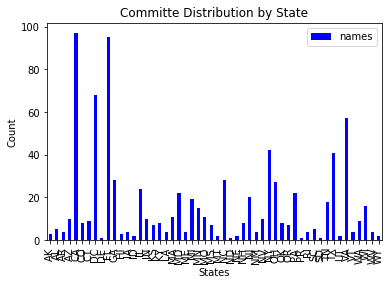

In [38]:
data_state = data_commitee.groupby('State').count()
ax = data_state['Committe_Name'].plot.bar(color = 'b',label = 'names')
plt.title('Committe Distribution by State')
plt.ylabel('Count')
plt.xlabel('States')
plt.legend()

In [26]:
import plotly.graph_objects as go

In [48]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

figure = go.Figure(data=go.Choropleth(
    locations=data_commitee1['State'], # Spatial coordinates
    z = data_commitee1['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

figure.update_layout(
    title_text = 'Distribution of committees by state',
    geo_scope='usa', # limite map scope to USA
)

figure.show()

In [29]:
conn.close()

## Classification - Social Media

This portion of the project explores using classification models for various tasks. 

### Task 5 (12 points)

For this problem, you want to classify the age of an individual (“High School” or “Adult”) basic on their social media app usage. The data was collected via a survey, with respondents consisting of the Women in Computing Sciences Summer Youth Program participants and female faculty at Michigan Tech. The data is available at `syp-s16-data.csv`. There are 60 responses with 26 Adults and 34 HS respondents.

**Visualization**  After loading in the data, you should create a small multiples plot showing the number of respondents who use or do not use each app grouped by age (HS vs. Adult). Consider making multiple grouped bar plots for each social media app.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

In [2]:
data = pd.read_csv('data/data/syp-16-data.csv')
data.head(20)

,Facebook,Twitter,LinkedIn,Google+,Youtube,Pinterest,Instagram,Tumblr,Flickr,Snapchat,WhatsApp,Vine,Periscope,Viber,KikMessenger,Telegram,ooVoo,YikYak,Other,Adult
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Adult
5,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult
6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult


In [32]:
data_list = list(data)
data_list_c = list(data.columns)

In [33]:
data_1 = data.sum(numeric_only=True)
data_2 = data.groupby(['Adult']).sum(numeric_only=True)

Text(0.5, 0, 'Social Media Apps')

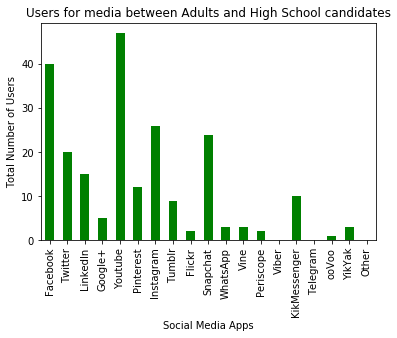

In [34]:
data_1.plot.bar(color = 'green')
plt.title('Users for media between Adults and High School candidates')
plt.ylabel('Total Number of Users')
plt.xlabel('Social Media Apps')

In [35]:
data_list_High_School = []
data_list_Adults = []
data_list.pop()
Adults = 0
high_school = 0

for i in data_list:
    Adults = 0
    high_school = 0
    
    for j in range (0,len(data[i])):
        
        if (data[i][j] == 1) and (data.iloc[j,19] == 'Adult'):
            Adults += 1
            
        if (data[i][j] == 1) and (data.iloc[j,19] == 'HS'):
            high_school += 1
            
    data_list_High_School.append(high_school)
    data_list_Adults.append(Adults)
    
Total_data = pd.DataFrame(list(zip(data_list,data_list_High_School,data_list_Adults)), columns =['Name','High_School','Adult'])

Text(0.5, 0, 'Social Media Apps')

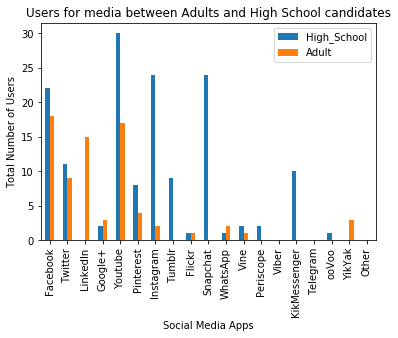

In [36]:
ax = Total_data.plot.bar(x = 'Name')
plt.title('Users for media between Adults and High School candidates')
plt.ylabel('Total Number of Users')
plt.xlabel('Social Media Apps')

In [37]:
Total_data_adults = Total_data['Adult'].values
Total_data_hs = Total_data['High_School'].values

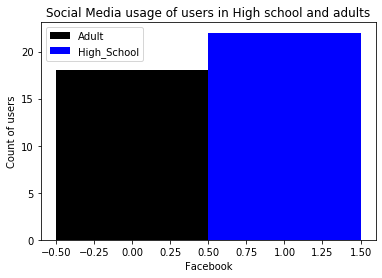

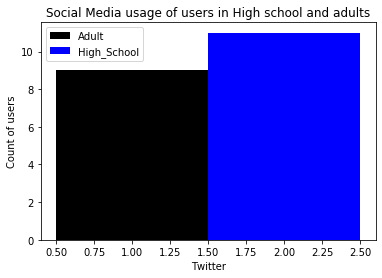

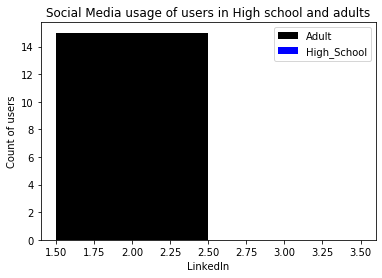

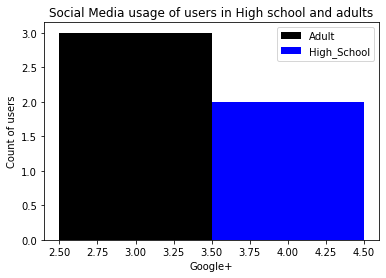

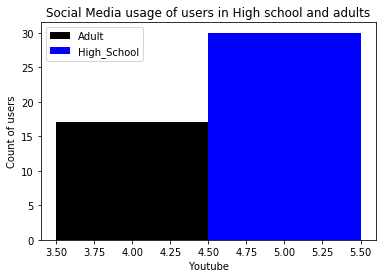

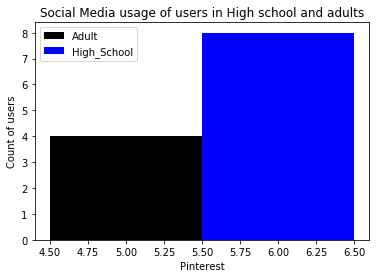

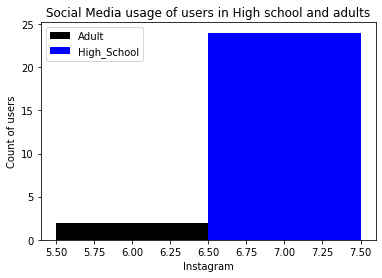

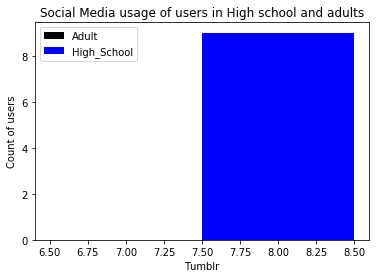

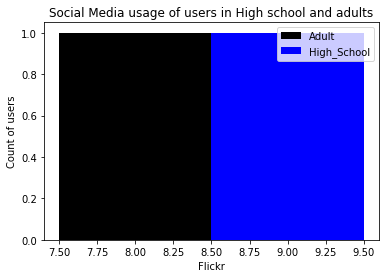

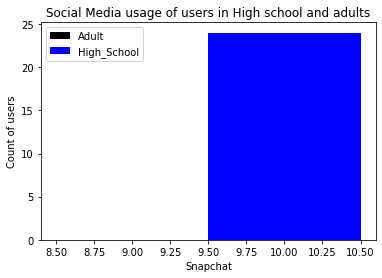

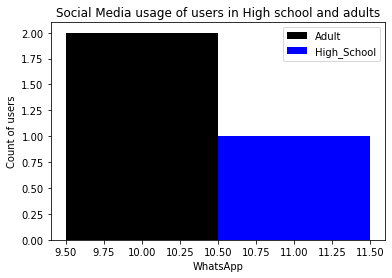

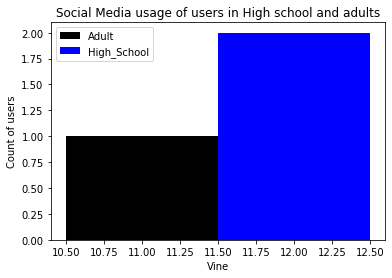

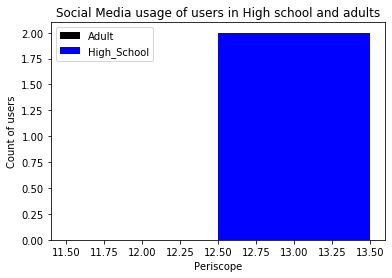

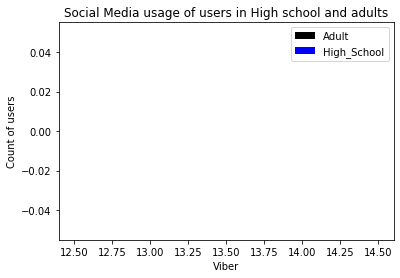

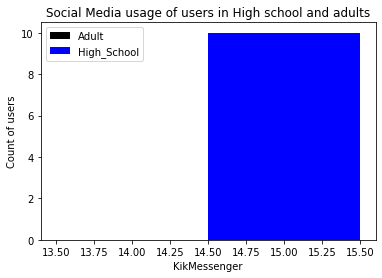

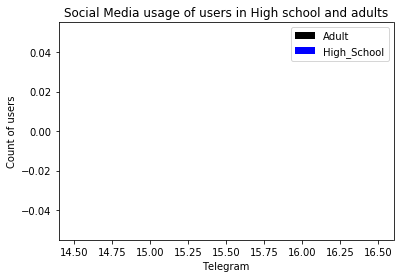

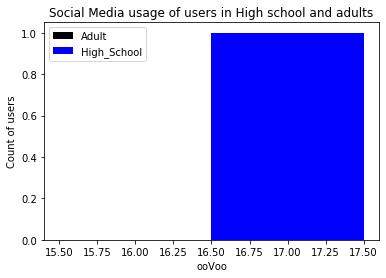

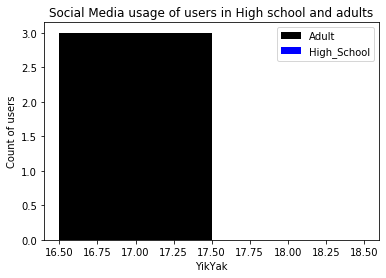

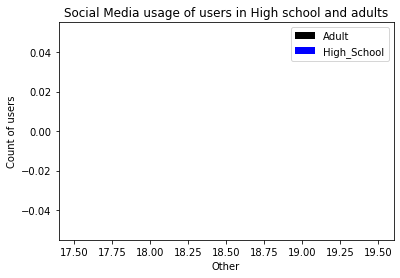

In [38]:
length_data = len(data_list_c)
for x in range(length_data - 1):
    plt.figure()
    plt.bar(x , Total_data_adults[x], color = 'black', width = 1, label='Adult')
    plt.bar(x + 1, Total_data_hs[x], color='blue', width = 1,label='High_School')
    plt.title("Social Media usage of users in High school and adults")
    plt.xlabel( data_list_c[x])
    plt.ylabel("Count of users")
    plt.legend()
plt.show()

### Task 6  (3 points)

From the figures in the Task above, which of the apps would you expect to find at the root of a deicision tree? That is, which app (variable) would be best to separate the two classes of responses?

# Answer 
Snapchat will be at the root of a decision since it has only hs and not adult.

### Task 7 (10 points)

Construct a decision tree using this data set. Does the variable at the root of the tree match the intuition from part (b)?

In [3]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
#from pydot import graph_from_dot_data
import graphviz

In [4]:
x_plot = data.iloc[:,:-1]
y_plot = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x_plot,y_plot,test_size=0.25)

In [5]:
from sklearn import metrics

In [6]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
count_misclassified = (y_test!=y_pred).sum()
print('Misclassified samples are {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy is {:.2f}'.format(accuracy))
feature_names = x_plot.columns
import graphviz
dot_data = tree.export_graphviz(decision_tree, feature_names=feature_names, out_file=None, filled=True, rounded=True, class_names = ['Adult','High_School'])
decision_tree_graph = graphviz.Source(dot_data)  

Misclassified samples are 1
Accuracy is 0.93


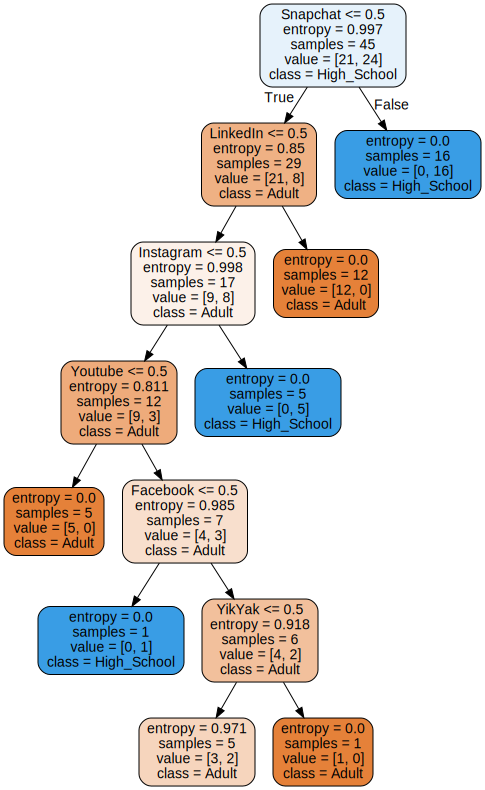

In [7]:
decision_tree_graph

Yes, the variable at the root matches my intuition in Task 6. 

## Classification - Music Hits 

For this problem, you will work to classify a song’s popularity. Specifically, you will develop methods to predict whether a song will make the Top10 of Billboard’s Hot 100 Chart. The data set consists of song from the Top10 of Billboard’s Hot 100 Chart from 1990-2010 along with a sampling of other songs that did not make the list.  

The data source is the MIT 15.071 course. The data set was created by scraping Billboard’s Hot 100, other songs on Billboard, and using the EchoNest API, now a part of Spotify, to get song information.

The variables included in the data set include several description of the song and artist (including song title and id numbers), the year the song was released. Additionally, several variables describe the song attributes: time signature, loudness, tempo, key, energy pitch, and timbre (measured of different sections of the song). The last variable is binary indicated whether the song was in the Top10 or not.

You will use the variables of the song attributes (excluding the variables involving confidence in that attribute, e.g., key confidence) to predict whether the song will be popular or not.

### Task 8  (5 points)

Load in the `music` data. You should not use the artist or song title and IDs in the prediction along with the confidence variables.  *Note: to read in the csv you may need to adjust the encoding to avoid errors*

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm

In [44]:
music_data = pd.read_csv('data/data/music.csv', sep=',', encoding='latin-1')
music_data.shape

(7574, 39)

In [45]:
music_data.head(20)

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
5,2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,...,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0
6,2010,All Signs Point to Lauderdale,A Day to Remember,SODZEHH1377566C93F,AROBSHL1187B9AFB01,4,0.968,-4.114,149.967,0.273,...,97.938,-57.289,34.989,-35.724,72.925,-66.070,75.881,-51.232,28.741,0
7,2010,Out of Time,A Day to Remember,SOJQXRI12C5664F058,AROBSHL1187B9AFB01,4,0.861,-3.683,160.328,0.830,...,114.817,-56.108,25.915,-69.726,112.780,-117.207,27.494,-50.713,31.470,0
8,2010,If I Leave,A Day to Remember,SOWCXMH137733DA46E,AROBSHL1187B9AFB01,4,0.622,-4.967,155.112,0.018,...,67.466,-53.234,40.445,-33.081,50.643,-61.121,50.245,-53.695,26.625,0
9,2010,Whataya Want From Me,Adam Lambert,SOFOBLL13A9E22142F,ARIGTAO11FED0C4411,4,0.938,-15.557,95.904,0.929,...,99.150,-69.346,56.233,-94.733,62.789,-102.870,65.328,-48.411,47.376,1


In [46]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
year                        7574 non-null int64
songtitle                   7574 non-null object
artistname                  7574 non-null object
songID                      7574 non-null object
artistID                    7574 non-null object
timesignature               7574 non-null int64
timesignature_confidence    7574 non-null float64
loudness                    7574 non-null float64
tempo                       7574 non-null float64
tempo_confidence            7574 non-null float64
key                         7574 non-null int64
key_confidence              7574 non-null float64
energy                      7574 non-null float64
pitch                       7574 non-null float64
timbre_0_min                7574 non-null float64
timbre_0_max                7574 non-null float64
timbre_1_min                7574 non-null float64
timbre_1_max                7574 non-null float64
tim

In [47]:
music_data_1 = ['songtitle','artistname','songID','artistID','timesignature_confidence','tempo_confidence','key_confidence','Top10']
music_data_2 = music_data.drop(music_data_1,axis = 1)
music_data_2.head(20)

,year,timesignature,loudness,tempo,key,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
0,2010,3,-4.262,91.525,11,0.966656,0.024,0.002,57.342,-6.496,...,-71.127,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989
1,2010,4,-4.051,140.048,10,0.984710,0.025,0.000,57.414,-37.351,...,-65.807,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513
2,2010,4,-3.571,160.512,2,0.989900,0.026,0.003,57.422,-17.222,...,-67.433,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744
3,2010,4,-3.815,97.525,1,0.939207,0.013,0.000,57.765,-32.083,...,-63.667,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082
4,2010,4,-4.707,140.053,6,0.987738,0.063,0.000,56.872,-223.922,...,-55.935,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758
5,2010,4,-3.807,160.366,4,0.979953,0.038,0.000,57.083,-40.408,...,-79.948,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453
6,2010,4,-4.114,149.967,10,0.982961,0.026,0.707,57.278,-64.096,...,-102.725,97.938,-57.289,34.989,-35.724,72.925,-66.070,75.881,-51.232,28.741
7,2010,4,-3.683,160.328,5,0.979080,0.033,0.047,57.068,-88.510,...,-98.327,114.817,-56.108,25.915,-69.726,112.780,-117.207,27.494,-50.713,31.470
8,2010,4,-4.967,155.112,9,0.988699,0.027,0.000,56.637,-4.036,...,-79.198,67.466,-53.234,40.445,-33.081,50.643,-61.121,50.245,-53.695,26.625
9,2010,4,-15.557,95.904,11,0.425909,0.004,15.599,47.851,-83.614,...,-90.897,99.150,-69.346,56.233,-94.733,62.789,-102.870,65.328,-48.411,47.376


In [48]:
music_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 31 columns):
year             7574 non-null int64
timesignature    7574 non-null int64
loudness         7574 non-null float64
tempo            7574 non-null float64
key              7574 non-null int64
energy           7574 non-null float64
pitch            7574 non-null float64
timbre_0_min     7574 non-null float64
timbre_0_max     7574 non-null float64
timbre_1_min     7574 non-null float64
timbre_1_max     7574 non-null float64
timbre_2_min     7574 non-null float64
timbre_2_max     7574 non-null float64
timbre_3_min     7574 non-null float64
timbre_3_max     7574 non-null float64
timbre_4_min     7574 non-null float64
timbre_4_max     7574 non-null float64
timbre_5_min     7574 non-null float64
timbre_5_max     7574 non-null float64
timbre_6_min     7574 non-null float64
timbre_6_max     7574 non-null float64
timbre_7_min     7574 non-null float64
timbre_7_max     7574 non-null float64
ti

In [49]:
music_data_3 = copy.deepcopy(music_data.Top10)
music_data_4 = music_data_2

In [50]:
music_data_4.head(20)

,year,timesignature,loudness,tempo,key,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
0,2010,3,-4.262,91.525,11,0.966656,0.024,0.002,57.342,-6.496,...,-71.127,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989
1,2010,4,-4.051,140.048,10,0.984710,0.025,0.000,57.414,-37.351,...,-65.807,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513
2,2010,4,-3.571,160.512,2,0.989900,0.026,0.003,57.422,-17.222,...,-67.433,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744
3,2010,4,-3.815,97.525,1,0.939207,0.013,0.000,57.765,-32.083,...,-63.667,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082
4,2010,4,-4.707,140.053,6,0.987738,0.063,0.000,56.872,-223.922,...,-55.935,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758
5,2010,4,-3.807,160.366,4,0.979953,0.038,0.000,57.083,-40.408,...,-79.948,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453
6,2010,4,-4.114,149.967,10,0.982961,0.026,0.707,57.278,-64.096,...,-102.725,97.938,-57.289,34.989,-35.724,72.925,-66.070,75.881,-51.232,28.741
7,2010,4,-3.683,160.328,5,0.979080,0.033,0.047,57.068,-88.510,...,-98.327,114.817,-56.108,25.915,-69.726,112.780,-117.207,27.494,-50.713,31.470
8,2010,4,-4.967,155.112,9,0.988699,0.027,0.000,56.637,-4.036,...,-79.198,67.466,-53.234,40.445,-33.081,50.643,-61.121,50.245,-53.695,26.625
9,2010,4,-15.557,95.904,11,0.425909,0.004,15.599,47.851,-83.614,...,-90.897,99.150,-69.346,56.233,-94.733,62.789,-102.870,65.328,-48.411,47.376


### Task 9  (35 points)

**A.** Use kNN to predict whether a song is a hit. Estimate the generalization performance over the 10-folds, calculate and report the accuracy, error, and AUC performance on the testing data. Show these results for three values of k = 1, 3, 5, 7, 9.

**B.** Use Random Forests to predict whether a song is a hit. Calculate and report the accuracy, error, and AUC performance on the testing data for number of estimators = 10, 50, 100.

**C.** Use a Support Vector Machine (SVM) with a RBF kernel to predict whether the song is a hit. Consider at least the following values for cost: 0.01, 0.1, 1, 10, 100. Calculate and report the accuracy, error, and AUC performance on the testing data for the best model found.

Summarize and report out on the results of this task. 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(music_data_4,music_data_3,test_size=0.33)

In [53]:
#A

In [54]:
k = [1,3,5,7,9]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, x_test, y_test, cv=10, scoring='accuracy')
    scores_mean = scores.mean()
    scores_error = 1 - scores_mean
    Score_roc_auc = cross_val_score(knn, x_test, y_test, cv=10,scoring='roc_auc')
    score_roc_auc_mean = Score_roc_auc.mean()
    print("if k value is :",i)
    print("Then Accuracy", scores_mean)
    print("Then Error", scores_error)
    print("Then AUC:", score_roc_auc_mean)
    print("..........")

if k value is : 1
Then Accuracy 0.7843364085825373
Then Error 0.21566359141746272
Then AUC: 0.5704442529746812
..........
if k value is : 3
Then Accuracy 0.827572159554553
Then Error 0.172427840445447
Then AUC: 0.6257485648392516
..........
if k value is : 5
Then Accuracy 0.8432123585977376
Then Error 0.15678764140226242
Then AUC: 0.6578348995904962
..........
if k value is : 7
Then Accuracy 0.8515981055696891
Then Error 0.14840189443031093
Then AUC: 0.6745465702763029
..........
if k value is : 9
Then Accuracy 0.8520012800204804
Then Error 0.14799871997951963
Then AUC: 0.6879955746335339
..........


In [55]:
#B

In [56]:
k = [10,50,100]
for i in k:
    random = RandomForestClassifier(n_estimators=i,oob_score = True)
    scores = cross_val_score(random, x_test, y_test, cv=10, scoring='accuracy')
    scores_mean = scores.mean()
    scores_error = 1 - scores_mean
    Score_roc_auc = cross_val_score(random, x_test, y_test, cv=10,scoring='roc_auc')
    score_roc_auc_mean = Score_roc_auc.mean()
    print("if k value is :",i)
    print("Then Accuracy", scores_mean)
    print("Then Error", scores_error)
    print("Then AUC:", score_roc_auc_mean)
    print("............")

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value encountered in true_divide

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value encountered in true_divide

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\winapps\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value encountered in true_div

if k value is : 10
Then Accuracy 0.8563837885406166
Then Error 0.1436162114593834
Then AUC: 0.7054698685240959
............
if k value is : 50
Then Accuracy 0.8623998399974401
Then Error 0.13760016000255992
Then AUC: 0.7615225468583434
............
if k value is : 100
Then Accuracy 0.863598246371942
Then Error 0.13640175362805795
Then AUC: 0.7761899069560448
............


In [57]:
#C

In [58]:
from sklearn.svm import SVC
k = [0.01,0.1,1,10,100]
for i in k:
    svm = SVC(kernel='rbf', random_state=0, gamma='auto', C=i)
    scores = cross_val_score(svm, x_test, y_test, cv=10, scoring='accuracy')
    scores_mean = scores.mean()
    scores_error = 1 - scores_mean
    Score_roc_auc = cross_val_score(svm, x_test, y_test, cv=10,scoring='roc_auc')
    score_roc_auc_mean = Score_roc_auc.mean()
    print("if k value is :",i)
    print("Then Accuracy", scores_mean)
    print("Then Error", scores_error)
    print("Then AUC:", score_roc_auc_mean)
    print("...........")

if k value is : 0.01
Then Accuracy 0.8576045824733196
Then Error 0.1423954175266804
Then AUC: 0.498377466251298
...........
if k value is : 0.1
Then Accuracy 0.8576045824733196
Then Error 0.1423954175266804
Then AUC: 0.498377466251298
...........
if k value is : 1
Then Accuracy 0.8576045824733196
Then Error 0.1423954175266804
Then AUC: 0.498377466251298
...........
if k value is : 10
Then Accuracy 0.8572029760476167
Then Error 0.14279702395238325
Then AUC: 0.498377466251298
...........
if k value is : 100
Then Accuracy 0.8572029760476167
Then Error 0.14279702395238325
Then AUC: 0.498377466251298
...........


In [59]:
#Summary